# Reflectance FTIR Spectra

- This Jupyter notebook applies the Newtonian inversion to the molar absorptivity data. 

- The Jupyter notebook and data can be accessed here: https://github.com/SarahShi/PyIRoGlass/blob/main/docs/examples/inversion/. 

- You need to have the PyIRoGlass PyPi package on your machine once. If you have not done this, please uncomment (remove the #) symbol and run the cell below. 

In [1]:
#!pip install PyIRoGlass

# Load Python Packages

In [2]:
# Import packages

import os
import sys
import glob
import numpy as np
import pandas as pd
import mc3

import PyIRoGlass as pig

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc, cm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Data 

Load all compiled molar absorptivity data and assign uncertainties to the peaks. 

In [3]:
df_5200 = pd.read_excel('./EpsilonRegression.xlsx', sheet_name='NIRRegress')
tau_5200 = df_5200['Tau']
sigma_tau_5200 = tau_5200 * 0.025
epsilon_5200 = df_5200['Epsilon_5200']
sigma_epsilon_5200 = epsilon_5200 * 0.10

df_4500 = pd.read_excel('./EpsilonRegression.xlsx', sheet_name='NIRRegress')
tau_4500 = df_4500['Tau']
sigma_tau_4500 = tau_4500 * 0.025
epsilon_4500 = df_4500['Epsilon_4500']
sigma_epsilon_4500 = epsilon_4500 * 0.20

df_3550 = pd.read_excel('./EpsilonRegression.xlsx', sheet_name='3550Regress')
tau_3550 = df_3550['Tau']
sigma_tau_3550 = tau_3550 * 0.025
epsilon_3550 = df_3550['Epsilon_3550']
sigma_epsilon_3550 = epsilon_3550 * 0.10

df_1635 = pd.read_excel('./EpsilonRegression.xlsx', sheet_name='1635Regress')
tau_1635 = df_1635['Tau']
sigma_tau_1635 = tau_1635 * 0.025
epsilon_1635 = df_1635['Epsilon_1635']
sigma_epsilon_1635 = epsilon_1635 * 0.05

df_carbonate = pd.read_excel('./EpsilonRegression.xlsx', sheet_name='CarbonateRegress')
eta = df_carbonate['Na/Na+Ca']
sigma_eta = eta * 0.025
epsilon_carbonate = df_carbonate['Epsilon_Carbonate']
sigma_epsilon_carbonate = epsilon_carbonate * 0.10

We're ready to use the Inversion function now. We input the arguments of the compositional parameter, uncertainty on the compositional parameters, absorption coefficient, and uncertainty on absorption coefficient. 

In [4]:
mest_5200, covm_est_5200, covepsilon_5200 = pig.Inversion(tau_5200, epsilon_5200, sigma_tau_5200, sigma_epsilon_5200)
mls_5200, covls_5200 = pig.Least_Squares(tau_5200, epsilon_5200, sigma_tau_5200, sigma_epsilon_5200)
E_calib_5200, see_inv_5200, r2_inv_5200, rmse_inv_5200 = pig.Inversion_Fit_Errors(tau_5200, epsilon_5200, mest_5200, covm_est_5200, covepsilon_5200)

mest_4500, covm_est_4500, covepsilon_4500 = pig.Inversion(tau_4500, epsilon_4500, sigma_tau_4500, sigma_epsilon_4500)
mls_4500, covls_4500 = pig.Least_Squares(tau_4500, sigma_tau_4500, epsilon_4500, sigma_epsilon_4500)
E_calib_4500, see_inv_4500, r2_inv_4500, rmse_inv_4500 = pig.Inversion_Fit_Errors(tau_4500, epsilon_4500, mest_4500, covm_est_4500, covepsilon_4500)

mest_3550, covm_est_3550, covepsilon_3550 = pig.Inversion(tau_3550, epsilon_3550, sigma_tau_3550, sigma_epsilon_3550)
mls_3550, covls_3550 = pig.Least_Squares(tau_3550, epsilon_3550, sigma_tau_3550, sigma_epsilon_3550)
E_calib_3550, see_inv_3550, r2_inv_3550, rmse_inv_3550 = pig.Inversion_Fit_Errors(tau_3550, epsilon_3550, mest_3550, covm_est_3550, covepsilon_3550)

mest_1635, covm_est_1635, covepsilon_1635 = pig.Inversion(tau_1635, epsilon_1635, sigma_tau_1635, sigma_epsilon_1635)
mls_1635, covls_1635 = pig.Least_Squares(tau_1635, epsilon_1635, sigma_tau_1635, sigma_epsilon_1635)
E_calib_1635, see_inv_1635, r2_inv_1635, rmse_inv_1635 = pig.Inversion_Fit_Errors(tau_1635, epsilon_1635, mest_1635, covm_est_1635, covepsilon_1635)

mest_carbonate, covm_est_carbonate, covepsilon_carbonate = pig.Inversion(eta, epsilon_carbonate, sigma_eta, sigma_epsilon_carbonate)
mls_carbonate, covls_carbonate = pig.Least_Squares(eta, epsilon_carbonate, sigma_eta, sigma_epsilon_carbonate)
E_calib_carbonate, see_inv_carbonate, r2_inv_carbonate, rmse_inv_carbonate = pig.Inversion_Fit_Errors(eta, epsilon_carbonate, mls_carbonate, covls_carbonate, covepsilon_carbonate)


Initial error in implicit equation = 1.0484975092736677
Final error in implicit equation =  4.35845650134609e-29
Final error in implicit equation =  1.1241267899399418e-29
Final error in implicit equation =  1.00579765415679e-29
Final error in implicit equation =  1.0452406994178406e-29
Final error in implicit equation =  1.0452406994178406e-29
Final error in implicit equation =  9.269115636346889e-30
Final error in implicit equation =  9.860761315262648e-30
Final error in implicit equation =  9.663546088957395e-30
Final error in implicit equation =  1.0452406994178406e-29
Initial error in implicit equation = 1.6622314018979103
Final error in implicit equation =  1.3055647981407745e-28
Final error in implicit equation =  8.785938331899019e-29
Final error in implicit equation =  2.130417482162495e-28
Final error in implicit equation =  1.0310412031238624e-27
Final error in implicit equation =  1.2606983341563295e-28
Final error in implicit equation =  9.386458695998514e-28
Final error i

Write a function for assessing uncertainty of prediction

In [5]:
def Confidence_Prediction_Intervals(comp, epsilon, mest_f): 

    from scipy import stats

    n = len(epsilon); 
    comp_arr = np.linspace(0, 1, 100)
    linex = comp_arr
    liney = mest_f[0] + mest_f[1]*comp_arr

    epsilon_linear = mest_f[0] + mest_f[1]*comp
    epsilon_mean = np.mean(epsilon)
    xm = np.mean(comp)

    yhat = epsilon_linear 
    ybar = np.mean(epsilon)
    totalsumsq = np.sum((epsilon-ybar)**2)
    ssregress = np.sum((yhat-ybar)**2)
    ssresid = np.sum((epsilon-yhat)**2) 
    sstotal = ssregress + ssresid
    r2 = 1-(ssresid/sstotal)

    ssxx = sum((comp - xm)**2); 

    ttest = stats.t.ppf(((1-0.68)/2), n-2)
    se = np.sqrt(ssresid / (n-2))

    conf_upper = liney + (ttest*se*np.sqrt(1/n+(linex-xm)**2/ssxx))
    conf_lower = liney - (ttest*se*np.sqrt(1/n+(linex-xm)**2/ssxx))

    pred_upper = liney + (ttest*se*np.sqrt(1 + 1/n+(linex-xm)**2/ssxx))
    pred_lower = liney - (ttest*se*np.sqrt(1 + 1/n+(linex-xm)**2/ssxx))

    return comp_arr, liney, conf_lower, conf_upper, pred_lower, pred_upper


tau_arr_5200, epsilon_5200_arr, conf_lower_5200, conf_upper_5200, pred_lower_5200, pred_upper_5200 = Confidence_Prediction_Intervals(tau_5200, epsilon_5200, mest_5200)
tau_arr_4500, epsilon_4500_arr, conf_lower_4500, conf_upper_4500, pred_lower_4500, pred_upper_4500 = Confidence_Prediction_Intervals(tau_4500, epsilon_4500, mest_4500)
tau_arr_3550, epsilon_3550_arr, conf_lower_3550, conf_upper_3550, pred_lower_3550, pred_upper_3550 = Confidence_Prediction_Intervals(tau_3550, epsilon_3550, mest_3550)
tau_arr_1635, epsilon_1635_arr, conf_lower_1635, conf_upper_1635, pred_lower_1635, pred_upper_1635 = Confidence_Prediction_Intervals(tau_1635, epsilon_1635, mest_1635)
eta_arr, epsilon_carbonate_arr, conf_lower_carbonate, conf_upper_carbonate, pred_lower_carbonate, pred_upper_carbonate = Confidence_Prediction_Intervals(eta, epsilon_carbonate, mest_carbonate)


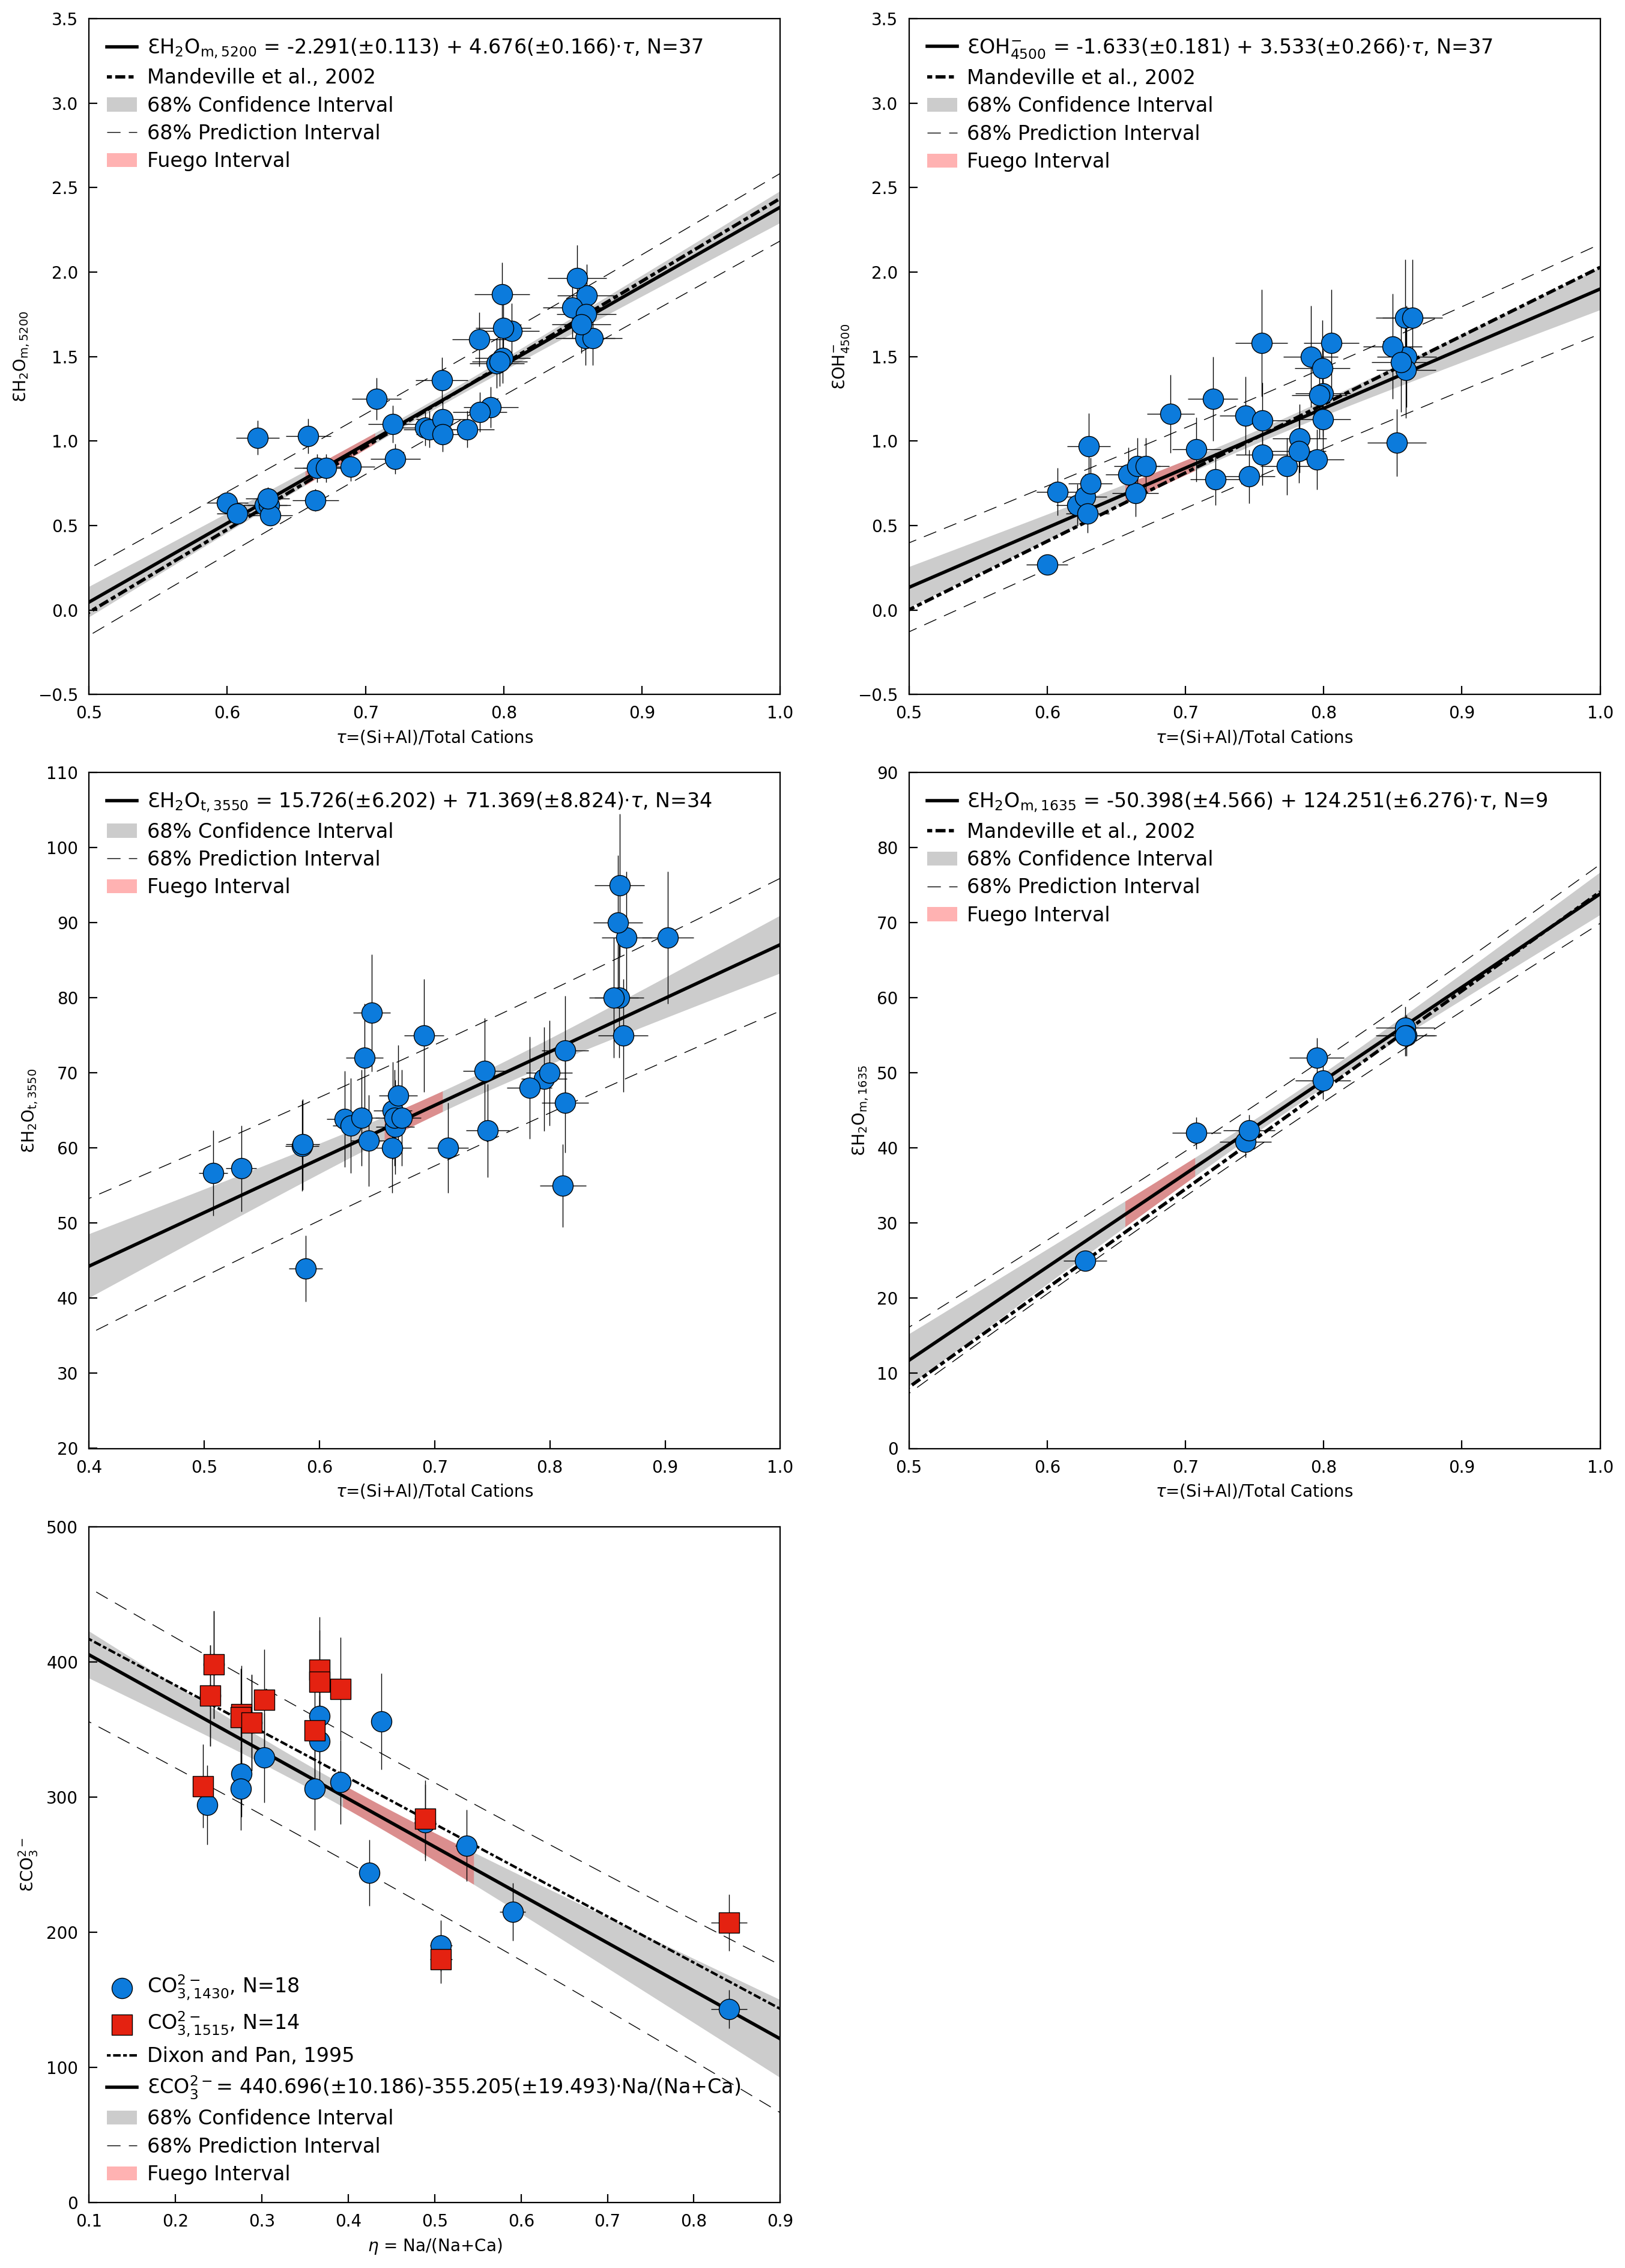

In [6]:
sz = 150

fig, ax = plt.subplots(3, 2, figsize = (14, 19))
ax = ax.flatten()

epsilon_5200_mandeville = -2.463 + 4.899*tau_arr_5200

fuego_idx = np.where((tau_arr_5200 > 0.653) & (tau_arr_5200 < 0.715))

legend_5200 = '$\mathregular{ƐH_2O_{m, 5200}}$ = ' + f'{round(mest_5200[0],3)}(±{round(np.sqrt(np.diag(covm_est_5200))[0],3)}) + {round(mest_5200[1],3)}(±{round(np.sqrt(np.diag(covm_est_5200))[1],3)})'+ '·' + '$\\tau$'+ f', N={len(tau_5200)}'

ax[0].plot(tau_arr_5200, epsilon_5200_arr, 'k', lw = 2, zorder = 0, label = legend_5200)
mand, = ax[0].plot(tau_arr_5200, epsilon_5200_mandeville, 'k-.', lw = 2, zorder = 0, label = 'Mandeville et al., 2002')
mand.set_dashes([1.5, 1, 3, 1])
ax[0].fill_between(tau_arr_5200, conf_lower_5200, conf_upper_5200, color = 'k', alpha=0.20, edgecolor = None,
    zorder = -5, label='68% Confidence Interval')
ax[0].plot(tau_arr_5200, pred_upper_5200, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10))
ax[0].plot(tau_arr_5200, pred_lower_5200, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10), label = '68% Prediction Interval')
ax[0].fill_between(tau_arr_5200[fuego_idx], conf_lower_5200[fuego_idx], conf_upper_5200[fuego_idx], color = 'r', alpha=0.30,
    edgecolor = None, zorder = -5, label='Fuego Interval')
ax[0].errorbar(tau_5200, epsilon_5200, yerr = sigma_epsilon_5200, xerr = sigma_tau_5200, ls = 'none', elinewidth = 0.5, ecolor = 'k')
ax[0].scatter(tau_5200, epsilon_5200, s = sz, c = '#0C7BDC', edgecolors='black', linewidth = 0.5, zorder = 15)
ax[0].set_xlim([ 0.5, 1.0])
ax[0].set_ylim([-0.5, 3.5])
xlabel_5200 = '$\\tau$='+'(Si+Al)/Total Cations'
ax[0].set_xlabel(xlabel_5200)
ax[0].set_ylabel('$\mathregular{ƐH_2O_{m, 5200}}$')
ax[0].legend(loc = 'upper left', labelspacing = 0.4, handletextpad = 0.5, handlelength = 1.50, prop={'size': 12}, frameon=False)
ax[0].tick_params(axis="x", direction='in', length=5, pad = 6.5)
ax[0].tick_params(axis="y", direction='in', length=5, pad = 6.5)


epsilon_4500_mandeville = -2.026+4.054*tau_arr_4500

fuego_idx = np.where((tau_arr_4500 > 0.653) & (tau_arr_4500 < 0.715))
legend_4500 = '$\mathregular{ƐOH^{-}_{4500}}$ = ' + f'{round(mest_4500[0],3)}(±{round(np.sqrt(np.diag(covm_est_4500))[0],3)}) + {round(mest_4500[1],3)}(±{round(np.sqrt(np.diag(covm_est_4500))[1],3)})'+ '·' + '$\\tau$'+ f', N={len(tau_4500)}'

ax[1].plot(tau_arr_4500, epsilon_4500_arr, 'k', lw = 2, zorder = 0, label = legend_4500)
mand, = ax[1].plot(tau_arr_4500, epsilon_4500_mandeville, 'k-.', lw = 2, zorder = 0, label = 'Mandeville et al., 2002')
mand.set_dashes([1.5, 1, 3, 1])
ax[1].fill_between(tau_arr_4500, conf_lower_4500, conf_upper_4500, color = 'k', alpha=0.20, edgecolor = None,
    zorder = -5, label='68% Confidence Interval')
ax[1].plot(tau_arr_4500, pred_upper_4500, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10))
ax[1].plot(tau_arr_4500, pred_lower_4500, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10), label = '68% Prediction Interval')
ax[1].fill_between(tau_arr_4500[fuego_idx], conf_lower_4500[fuego_idx], conf_upper_4500[fuego_idx], color = 'r', alpha=0.30,
    edgecolor = None, zorder = -5, label='Fuego Interval')
ax[1].errorbar(tau_4500, epsilon_4500, yerr = sigma_epsilon_4500, xerr = sigma_tau_4500, ls = 'none', elinewidth = 0.5, ecolor = 'k')
ax[1].scatter(tau_4500, epsilon_4500, s = sz, c = '#0C7BDC', edgecolors='black', linewidth = 0.5, zorder = 15)
ax[1].set_xlim([ 0.5, 1.0])
ax[1].set_ylim([-0.5, 3.5])
xlabel_4500 = '$\\tau$=' + '(Si+Al)/Total Cations'
ax[1].set_xlabel(xlabel_4500) 
ax[1].set_ylabel('$\mathregular{ƐOH^{-}_{4500}}$')
ax[1].legend(loc = 'upper left', labelspacing = 0.4, handletextpad = 0.5, handlelength = 1.50, prop={'size': 12}, frameon=False)
ax[1].tick_params(axis="x", direction='in', length=5, pad = 6.5)
ax[1].tick_params(axis="y", direction='in', length=5, pad = 6.5)


fuego_idx = np.where((tau_arr_3550 > 0.653) & (tau_arr_3550 < 0.715))
legend_3550 = '$\mathregular{ƐH_2O_{t, 3550}}$ = ' + f'{round(mest_3550[0],3)}(±{round(np.sqrt(np.diag(covm_est_3550))[0],3)}) + {round(mest_3550[1],3)}(±{round(np.sqrt(np.diag(covm_est_3550))[1],3)})'+ '·' + '$\\tau$'+ f', N={len(tau_3550)}'

ax[2].plot(tau_arr_3550, epsilon_3550_arr, 'k', lw = 2, zorder = 0, label = legend_3550)
mand.set_dashes([1.5, 1, 3, 1])
ax[2].fill_between(tau_arr_3550, conf_lower_3550, conf_upper_3550, color = 'k', alpha=0.20, edgecolor = None,
    zorder = -5, label='68% Confidence Interval')
ax[2].plot(tau_arr_3550, pred_upper_3550, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10))
ax[2].plot(tau_arr_3550, pred_lower_3550, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10), label = '68% Prediction Interval')
ax[2].fill_between(tau_arr_3550[fuego_idx], conf_lower_3550[fuego_idx], conf_upper_3550[fuego_idx], color = 'r', alpha=0.30,
    edgecolor = None, zorder = -5, label='Fuego Interval')
ax[2].errorbar(tau_3550, epsilon_3550, yerr = sigma_epsilon_3550, xerr = sigma_tau_3550, ls = 'none', elinewidth = 0.5, ecolor = 'k')
ax[2].scatter(tau_3550, epsilon_3550, s = sz, c = '#0C7BDC', edgecolors='black', linewidth = 0.5, zorder = 15)
ax[2].set_xlim([0.4, 1.0])
ax[2].set_ylim([20, 110])
xlabel_3550 = '$\\tau$=' + '(Si+Al)/Total Cations'
ax[2].set_xlabel(xlabel_3550) 
ax[2].set_ylabel('$\mathregular{ƐH_2O_{t, 3550}}$')
ax[2].legend(loc = 'upper left', labelspacing = 0.4, handletextpad = 0.5, handlelength = 1.50, prop={'size': 12}, frameon=False)
ax[2].tick_params(axis="x", direction='in', length=5, pad = 6.5)
ax[2].tick_params(axis="y", direction='in', length=5, pad = 6.5)


epsilon_1635_mandeville = -57.813+131.94*tau_arr_1635

fuego_idx = np.where((tau_arr_1635 > 0.653) & (tau_arr_1635 < 0.715))
legend_1635 = '$\mathregular{ƐH_2O_{m, 1635}}$ = ' + f'{round(mest_1635[0],3)}(±{round(np.sqrt(np.diag(covm_est_1635))[0],3)}) + {round(mest_1635[1],3)}(±{round(np.sqrt(np.diag(covm_est_1635))[1],3)})'+ '·' + '$\\tau$'+ f', N={len(tau_1635)}'

ax[3].plot(tau_arr_1635, epsilon_1635_arr, 'k', lw = 2, zorder = 0, label = legend_1635)
mand, = ax[3].plot(tau_arr_1635, epsilon_1635_mandeville, 'k-.', lw = 2, zorder = 0, label = 'Mandeville et al., 2002')
mand.set_dashes([1.5, 1, 3, 1])
ax[3].fill_between(tau_arr_1635, conf_lower_1635, conf_upper_1635, color = 'k', alpha=0.20, edgecolor = None,
    zorder = -5, label='68% Confidence Interval')
ax[3].plot(tau_arr_1635, pred_upper_1635, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10))
ax[3].plot(tau_arr_1635, pred_lower_1635, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10), label = '68% Prediction Interval')
ax[3].fill_between(tau_arr_1635[fuego_idx], conf_lower_1635[fuego_idx], conf_upper_1635[fuego_idx], color = 'r', alpha=0.30,
    edgecolor = None, zorder = -5, label='Fuego Interval')
ax[3].errorbar(tau_1635, epsilon_1635, yerr = sigma_epsilon_1635, xerr = sigma_tau_1635, ls = 'none', elinewidth = 0.5, ecolor = 'k')
ax[3].scatter(tau_1635, epsilon_1635, s = sz, c = '#0C7BDC', edgecolors='black', linewidth = 0.5, zorder = 15)
ax[3].set_xlim([0.5, 1.0])
ax[3].set_ylim([0, 90])
xlabel_1635 = '$\\tau$=' + '(Si+Al)/Total Cations'
ax[3].set_xlabel(xlabel_1635) 
ax[3].set_ylabel('$\mathregular{ƐH_2O_{m, 1635}}$')
ax[3].legend(loc = 'upper left', labelspacing = 0.4, handletextpad = 0.5, handlelength = 1.50, prop={'size': 12}, frameon=False)
ax[3].tick_params(axis="x", direction='in', length=5, pad = 6.5)
ax[3].tick_params(axis="y", direction='in', length=5, pad = 6.5)

epsilon_carbonate_dixonpan = 451-342*eta_arr

fuego_idx = np.where((eta_arr > 0.389) & (eta_arr < 0.554))

df_carbonate = pd.read_excel('./EpsilonRegression.xlsx', sheet_name='CarbonateRegress')

low_df = df_carbonate[df_carbonate.Epsilon_Location == 'Low']
high_df = df_carbonate[df_carbonate.Epsilon_Location == 'High']

ax[4].errorbar(low_df['Na/Na+Ca'], low_df['Epsilon_Carbonate'], yerr = low_df['Epsilon_Carbonate']*0.1, xerr = low_df['Na/Na+Ca']*0.025, ls = 'none', elinewidth = 0.5, ecolor = 'k')
ax[4].scatter(low_df['Na/Na+Ca'], low_df['Epsilon_Carbonate'], s = sz, c = '#0C7BDC', edgecolors='black', linewidth = 0.5, zorder = 15, label = '$\mathregular{CO_{3, 1430}^{2-}}$, N='+str(len(low_df)))

ax[4].errorbar(high_df['Na/Na+Ca'], high_df['Epsilon_Carbonate'], yerr = high_df['Epsilon_Carbonate']*0.10, xerr = high_df['Na/Na+Ca']*0.025, ls = 'none', elinewidth = 0.5, ecolor = 'k')
ax[4].scatter(high_df['Na/Na+Ca'], high_df['Epsilon_Carbonate'], s = sz, c = '#E42211', marker = 's', edgecolors='black', linewidth = 0.5, zorder = 15, label = '$\mathregular{CO_{3, 1515}^{2-}}$, N='+str(len(high_df)))

dixonpan, = ax[4].plot(eta_arr, epsilon_carbonate_dixonpan, 'k-.', lw = 1.5, zorder = 0, label = 'Dixon and Pan, 1995')
dixonpan.set_dashes([1.5, 1, 3, 1])
legend_carbonate = '$\mathregular{ƐCO_3^{2-}}$= ' + f'{round(mest_carbonate[0],3)}(±{round(np.sqrt(np.diag(covm_est_carbonate))[0],3)})-{round(mest_carbonate[1],3)*-1}(±{round(np.sqrt(np.diag(covm_est_carbonate))[1],3)})' + '·' + f'Na/(Na+Ca)'
ax[4].plot(eta_arr, epsilon_carbonate_arr, 'k', lw = 2, zorder = 0, label = legend_carbonate)
ax[4].fill_between(eta_arr, conf_lower_carbonate, conf_upper_carbonate, color = 'k', alpha=0.20, edgecolor = None,
    zorder = -5, label='68% Confidence Interval')
ax[4].plot(eta_arr, pred_upper_carbonate, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10))
ax[4].plot(eta_arr, pred_lower_carbonate, 'k--', lw = 0.5, zorder = 0, dashes=(16, 10), label = '68% Prediction Interval')
ax[4].fill_between(eta_arr[fuego_idx], conf_lower_carbonate[fuego_idx], conf_upper_carbonate[fuego_idx], color = 'r', alpha=0.30, edgecolor = None,
    zorder = -5, label='Fuego Interval')
ax[4].set_xlim([0.1, 0.9])
ax[4].set_ylim([0, 500])
ax[4].set_xlabel('$\eta$ = Na/(Na+Ca)') 
ax[4].set_ylabel('$\mathregular{ƐCO_3^{2-}}$')
ax[4].legend(loc = 'lower left', labelspacing = 0.4, handletextpad = 0.5, handlelength = 1.50, prop={'size': 12}, frameon=False)
ax[4].tick_params(axis="x", direction='in', length=5, pad = 6.5)
ax[4].tick_params(axis="y", direction='in', length=5, pad = 6.5)

fig.delaxes(ax[5])

plt.tight_layout()
plt.savefig('AllEpsilonRegress.pdf')

# Apply Inversion Parameters to determine Molar Absorptivities with Uncertainties 

We'll use the Epsilon_Calc function, which takes in the parameters: 

- MI_Composition: Dataframe of MI Compositions 
- T_ROOM: Room temperature at time of FTIR analysis, given the sensitivity of density to T. 
- P_ROOM: Room pressure at time of FTIR analysis, given the sensitivity of density to P. 

and returns a dataframe of the appropriate absorbance coefficient and the uncertainty, following equation 8 from the paper. 

Load in our glass composition data with the Load_ChemThick function: 

In [7]:
CHEMTHICK_PATH = 'ChemThick.csv'
MICOMP, THICKNESS = pig.Load_ChemistryThickness(CHEMTHICK_PATH)
MICOMP

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5
Sample,,,,,,,,,,,
AC4_OL49_021920_30x30_H2O_a,52.34,1.04,17.92,1.93,7.03,0.20,3.63,7.72,4.25,0.78,0.14
AC4_OL53_101220_256s_30x30_a,47.95,1.00,18.88,2.04,7.45,0.19,4.34,9.84,3.47,0.67,0.11
STD_D1010_012821_256s_100x100_a,51.41,1.26,16.58,0.00,7.58,0.00,7.57,10.98,3.01,0.37,0.18


In [8]:
T_ROOM = 25 # C
P_ROOM = 1 # Bar

EPS_DF = pig.Epsilon_Calc(MICOMP, T_ROOM, P_ROOM)
EPS_DF

,Tau,Na/Na+Ca,epsilon_H2OT_3550,sigma_epsilon_H2OT_3550,epsilon_H2Om_1635,sigma_epsilon_H2Om_1635,epsilon_CO2,sigma_epsilon_CO2,epsilon_H2Om_5200,sigma_epsilon_H2Om_5200,epsilon_OH_4500,sigma_epsilon_OH_4500
AC4_OL49_021920_30x30_H2O_a,0.70599,0.499048,66.111161,7.524313,37.322108,8.645058,263.432023,20.347638,1.009457,0.300824,0.861196,0.279541
